## 트라이(Trie)
- 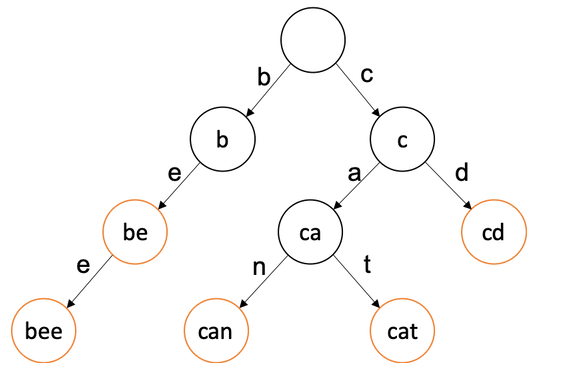
- 사전에서 'cancel'이라는 단어를 찾을 때 c의 색인을 찾고 그다음 a의 색인을 찾고 n -> c... 이런식으로 찾는다. 이러한 순서를 컴퓨터에 적용한 방식이 트라이 구조이다.
- 가장 긴 문자열을 $L$, 문자열의 개수를 $N$이라고 할 때
  - 트라이를 구축하는 시간복잡도는 $O(LN)$이다.
  - 트라이에 추가하는 시간복잡도는 $O(L)$이다.
  - 트라이에서 문자열을 찾는 시간복잡도는 $O(L)$이다.
  
### 트라이의 동작
- 트라이로 구성된 트리 구조를 `trie`, 추가하고자 하는 문자열을 `p`라고 하고, 시작 지점은 루트노드이다
  - p의 `i`번째 글자인 `p[i]`으로 가는 간선이 현재 노드에 존재하는지 확인한다. 
    - 존재한다면 `p[i]`로 가는 간선을 따라 다음노드로 이동한다.
    - 존재하지 않는다면 현재 노드에서 `p[i]`로 가는 노드와 간선을 만들고 해당 노드로 이동한다.
  - `i`가 `len(p)`가 될 때까지 위 과정을 반복한다.

In [10]:
class Trie:
  def __init__(self, *words):
    self.root = {}
    for word in words: #실제 구현에선 별로 필요없을듯
      self.add(word)

  def add(self, word):
    current_dict = self.root
    for letter in word:
      current_dict = current_dict.setdefault(letter, {})
    current_dict["_end_"] = True #추가한 단어임을 표시한다(add를 추가했는데 ad도 있다고 나오는 것을 방지하기 위해)

  def __contains__(self, word):
    current_dict = self.root
    for letter in word:
      if letter not in current_dict: #해당 노드가 존재하지 않음
        return False
      current_dict = current_dict[letter]
    return "_end_" in current_dict #가는 경로는 존재하나(어떤 단어의 접두사이나), 추가한 단어는 아님

  def __delitem__(self, word):
    current_dict = self.root
    nodes = [current_dict]
    for letter in word:
      current_dict = current_dict[letter]
      nodes.append(current_dict)
    del current_dict["_end_"]

words = ["apple", "app", "application", "apply"]
T = Trie(*words)
T.add("add")
T.add("addition")
del T["addition"]

print("addition" in T)
print("add" in T)
print("ad" in T)

T.add("ad")
print("ad" in T)

False
True
False
True


In [13]:
class Trie:
  def __init__(self):
    self.r = {}

  def add(self, s):
    cur = self.r
    for c in s:
      cur = cur.setdefault(c, {})
    cur["_end_"] = True

  def __contains__(self, s):
    cur = self.r
    for c in s:
      if c not in cur:
        return False
      cur = cur[c]
    return "_end_" in cur

  def __delitem__(self, s):
    cur = self.r
    S = [cur]
    for c in s:
      cur = cur[c]
      S.append(cur)
    del cur["_end_"]